In [1]:
from glob import glob
from datasets import Dataset, Features, Image, Value
from PIL import Image as PILImage
from torchvision.transforms import CenterCrop, Resize
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
LSDIR_paths = Dataset.from_dict({"path":glob("LSDIR/*/*.png")})

In [3]:
lanczos = PILImage.Resampling.LANCZOS
def load_image(sample):
    image_path = sample['path']
    image = PILImage.open(image_path)
    w = image.width
    h = image.height
    aspect = w/h
    if aspect <= 9/16:
        if w<756 or h<1344:
            image = CenterCrop((960,540))(Resize(540,lanczos)(image))
        else:
            image = CenterCrop((1344,756))(Resize(756,lanczos)(image))
    elif aspect <= 2/3:
        if w<816 or h<1224:
            image = CenterCrop((810,540))(Resize(540,lanczos)(image))
        else:
            image = CenterCrop((1224,816))(Resize(816,lanczos)(image))
    elif aspect >= 16/9:
        if w<1344 or h<756:
            image = CenterCrop((540,960))(Resize(540,lanczos)(image))
        else:
            image = CenterCrop((756,1344))(Resize(756,lanczos)(image))
    elif aspect >= 8/5:
        if w<1248 or h<780:
            image = CenterCrop((540,864))(Resize(540,lanczos)(image))
        else:
            image = CenterCrop((780,1248))(Resize(780,lanczos)(image))
    elif aspect >= 4/3:
        if w<1152 or h<864:
            image = CenterCrop((540,720))(Resize(540,lanczos)(image))
        else:
            image = CenterCrop((864,1152))(Resize(864,lanczos)(image))
    else:
        if w<1008 or h<1008:
            image = CenterCrop((540,540))(Resize(540,lanczos)(image))
        else:
            image = CenterCrop((1008,1008))(Resize(1008,lanczos)(image))
    return {
        "image": image,
        "w":image.width,
        "h":image.height,
        "mode":image.mode,
        "aspect":image.width/image.height,
        "n_pixels":image.width*image.height}

In [4]:
LSDIR = LSDIR_paths.map(load_image, writer_batch_size=1000, num_proc=24)

Map (num_proc=24):   0%|          | 0/84991 [00:00<?, ? examples/s]

In [5]:
all(mode == 'RGB' for mode in LSDIR['mode'])

True

In [6]:
np.unique(LSDIR['aspect'])

array([0.5625    , 0.66666667, 1.        , 1.33333333, 1.6       ,
       1.77777778])

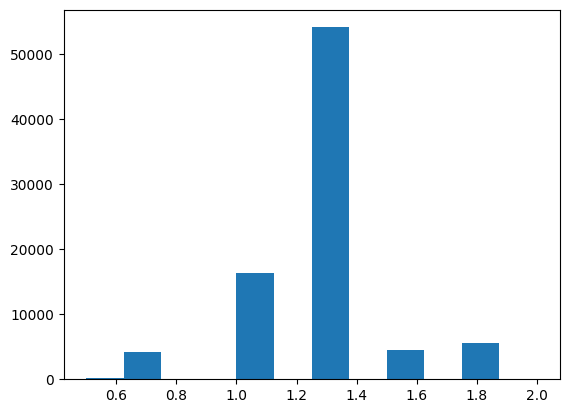

In [7]:
plt.hist(LSDIR['aspect'],bins=12, range=(0.5,2));

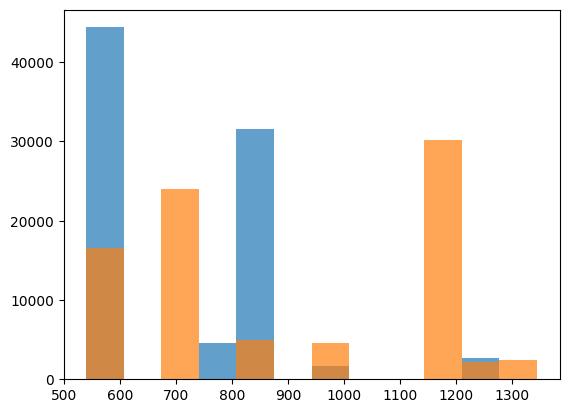

In [8]:
plt.hist(LSDIR['h'],bins=12,alpha=0.7);
plt.hist(LSDIR['w'],bins=12,alpha=0.7);

In [ ]:
LSDIR.push_to_hub("danjacobellis/LSDIR",split="train")  

In [2]:
LSDIR_paths = Dataset.from_dict({"path":glob("LSDIR_val/val1/HR/val/*.png")})

In [3]:
def load_image_val(sample):
    image_path = sample['path']
    image = PILImage.open(image_path)
    return {
        "image": image,
        "w":image.width,
        "h":image.height,
        "mode":image.mode,
        "aspect":image.width/image.height,
        "n_pixels":image.width*image.height}

In [4]:
LSDIR = LSDIR_paths.map(load_image_val, writer_batch_size=1000, num_proc=24)

Map (num_proc=24):   0%|          | 0/250 [00:00<?, ? examples/s]

In [7]:
LSDIR.push_to_hub("danjacobellis/LSDIR",split="validation")

Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/125 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Map:   0%|          | 0/125 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/491 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/danjacobellis/LSDIR/commit/fa63056ce9e7b118d5b29b3249254d4e8142cdad', commit_message='Upload dataset', commit_description='', oid='fa63056ce9e7b118d5b29b3249254d4e8142cdad', pr_url=None, pr_revision=None, pr_num=None)